In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns

df = pd.read_csv('data_nike_vs_addidas_unsupervised.csv')

# font_path = '/Library/Fonts/Arial Unicode.ttf'      # mac 폰트 추가
font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# 나이키 vs 아디다스 신발 데이터
# 총 column 항목 8개 (순차적으로 나열)
# Product Name, Product ID, Listing Price, Sale Price, Discount, Brand, Rating, Reviews

df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


In [99]:
print(f'총 제품 수: {len(df['Brand'])} 개')
print(f'총 나이키 제품 수: {len(df[df['Brand'] == 'Nike'])} 개')
print(f'총 아디다스 제품 수: {len(df[df['Brand'].str.contains('Adidas')])} 개')

In [100]:
nike = df[df['Brand'] == 'Nike']

In [101]:
adidas = df[df['Brand'].str.contains('Adidas')]

In [102]:
nike.info()         # 나이키 결측치 없음

<class 'pandas.core.frame.DataFrame'>
Index: 643 entries, 2625 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   643 non-null    object 
 1   Product ID     643 non-null    object 
 2   Listing Price  643 non-null    int64  
 3   Sale Price     643 non-null    int64  
 4   Discount       643 non-null    int64  
 5   Brand          643 non-null    object 
 6   Rating         643 non-null    float64
 7   Reviews        643 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 45.2+ KB


In [103]:
adidas.info()       # 아디다스 결측치 없음

<class 'pandas.core.frame.DataFrame'>
Index: 2625 entries, 0 to 2624
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   2625 non-null   object 
 1   Product ID     2625 non-null   object 
 2   Listing Price  2625 non-null   int64  
 3   Sale Price     2625 non-null   int64  
 4   Discount       2625 non-null   int64  
 5   Brand          2625 non-null   object 
 6   Rating         2625 non-null   float64
 7   Reviews        2625 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 184.6+ KB


In [104]:
# 나이키 제품 ID로 오름차순 정렬
nike_sorted = nike.sort_values(by='Product ID', ascending=True)
nike_sorted     # 제품 ID 달라도 이름 중복 확인

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
3062,Air Jordan 12 Retro,130690-017,0,15995,0,Nike,4.5,24
2751,Air Jordan 12 Retro,130690-017,0,15995,0,Nike,4.5,24
2833,Air Jordan OG,133000-106,0,11995,0,Nike,0.0,0
3124,Air Jordan OG,133000-106,0,11995,0,Nike,0.0,0
2750,Air Jordan 10 Retro,310805-137,0,15995,0,Nike,4.7,223
...,...,...,...,...,...,...,...,...
2767,Nike Air Max 2090,CW4286-100,0,11995,0,Nike,0.0,0
2994,Air Jordan 13 Retro Chinese New Year,CW4409-100,0,19995,0,Nike,5.0,1
2978,Jordan 'Why Not?' Zer0.2 SE,CW6565-900,0,11995,0,Nike,0.0,0
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,0.0,0


In [105]:
# 아디다스 제품 ID로 오름차순 정렬
adidas_sorted = adidas.sort_values(by='Product ID', ascending=True)
adidas_sorted   # 제품 ID 달라도 이름 중복 확인

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2308,Men's Originals Summer Adilette Slippers,280648,2999,2999,0,Adidas ORIGINALS,4.2,54
2309,Men's Originals Summer Adilette Slides,288022,2999,2999,0,Adidas ORIGINALS,3.3,95
91,men's ADIDAS ORIGINALS PW HU HOLI STAN SMITH S...,AC7042,9999,4999,50,Adidas ORIGINALS,3.1,49
1664,men's ADIDAS ORIGINALS PW HU HOLI STAN SMITH S...,AC7043,9999,4999,50,Adidas ORIGINALS,2.4,49
2086,men's ADIDAS ORIGINALS PW HU HOLI STAN SMITH S...,AC7044,9999,4999,50,Adidas ORIGINALS,3.7,78
...,...,...,...,...,...,...,...,...
1725,Men's adidas Originals STAN SMITH Low Shoes,S75104,7599,5319,30,Adidas ORIGINALS,4.9,70
2525,Men's Swim Adilette Supercloud Plus Thongs,S78048,3299,1649,50,Adidas CORE / NEO,4.1,13
1018,Women's adidas RUNNING cosmic 2 Low Shoes,S80662,5999,2400,60,Adidas CORE / NEO,2.0,28
1536,WoMEN'S adidas Outdoor TERREX VOYAGER DLX SHOES,S80807,7999,3200,60,Adidas SPORT PERFORMANCE,4.2,43


In [106]:
# 나이키 신발 제품명 당 제품 수
nike_product_counts = nike['Product Name'].value_counts()
nike_product_counts

Product Name
Nike Air Max 90                              14
Nike Air Max 270 React                        9
Nike Air Max 97                               7
Nike Air Zoom Pegasus 36                      6
Nike Air Max 2090                             5
                                             ..
Nike Mercurial Vapor 13 Club MG               1
Nike Zoom Pegasus Turbo 2 Special Edition     1
Nike Tiempo Legend 8 Academy TF               1
Air Jordan 8 Retro                            1
Nike P-6000 SE                                1
Name: count, Length: 393, dtype: int64

In [107]:
# 아디다스 신발 제품명 당 제품 수
adidas_product_counts = adidas['Product Name'].value_counts()
adidas_product_counts

Product Name
Men's adidas Originals Supercourt Shoes                 16
Women's adidas Originals Sambarose Shoes                16
Men's adidas Originals Stan Smith Shoes                 15
Men's adidas Originals Continental 80 Shoes             14
Unisex adidas Originals Marathon Tech Shoes             13
                                                        ..
Unisex adidas Basketball Harden Stepback Shoes           1
Kids-Unisex adidas Tennis Adizero Club Shoes             1
Men's Basketball Harden Vol. 4 GCA - Forbidden Shoes     1
Women's adidas Sport Inspired Storm Runner Shoes         1
Unisex adidas Outdoor Terrex Daroga Water Shoes          1
Name: count, Length: 1138, dtype: int64

In [108]:
# 나이키 신발: 제품명 중복값 제거
nike_drop_only_duplicated_jin = nike.drop_duplicates(subset=['Product Name'], keep='first')
nike_drop_duplicated = nike.drop_duplicates(subset=['Product Name'], keep='first')
nike_drop_duplicated = nike_drop_duplicated[nike_drop_duplicated['Rating'] > 1]

# 나이키 신발: 제품수 393개
# print(nike_drop_duplicated.count())

# 나이키 신발: 전체 소문자로 변경
def trans_small(text):
        words = text.split()
        return ' '.join(words[:]).lower()  # 성별 표시 제거
nike_drop_duplicated['Product Name'] = nike_drop_duplicated['Product Name'].apply(trans_small)

# 나이키 신발: 달러 단위 맞추기
nike_drop_duplicated['Sale Price'] = nike_drop_duplicated['Sale Price'] / 100
nike_drop_duplicated['Listing Price'] = nike_drop_duplicated['Listing Price'] / 100

# 나이키 신발: 제품명 출력
print(nike_drop_duplicated['Product Name'])

2633                    nike zoom pegasus turbo 2
2634                   nike air max 270 react eng
2635                              nike air max 90
2639                  nike air vapormax flyknit 3
2640                       nike air zoom superrep
                          ...                    
3235             nike air zoom pegasus 36 flyease
3237                       nike p-6000 icon clash
3244                           nike pre-love o.x.
3255    nike zoom pegasus turbo 2 special edition
3263                           air jordan 8 retro
Name: Product Name, Length: 250, dtype: object


In [109]:
# 아디다스 신발: 제품명 중복값 제거
adidas_drop_duplicated = adidas.drop_duplicates(subset=['Product Name'], keep='first')
adidas_drop_duplicated = adidas_drop_duplicated[adidas_drop_duplicated['Rating'] > 1].head(250)

# 아디다스 신발: 제품수 1138개 (성별 포함)
# print(adidas_drop_duplicated.count())

# 아디다스 신발: 제품명 (성별 포함)
# print(adidas_drop_duplicated['Product Name'])

# 아디다스 신발: 제품명 (성별 제외)
adidas_noSex = adidas_drop_duplicated
def remove_sex(text):
        words = text.split()
        if any(gender in words[0].upper() for gender in ["WOMEN'S", "MEN'S", "UNISEX"]):
            return ' '.join(words[1:]).lower()  # 성별 표시 제거

# 아디다스 신발: DataFrame의 'Product Name' 열에 적용
adidas_noSex['Product Name'] = adidas_noSex['Product Name'].apply(remove_sex)
adidas_noSex['Brand'] = adidas_noSex['Brand'].replace(r'(?i)adidas.*', 'Adidas', regex=True)

# 아디다스 신발: 달러 단위 맞추기
adidas_noSex['Sale Price'] = adidas_noSex['Sale Price'] / 100
adidas_noSex['Listing Price'] = adidas_noSex['Listing Price'] / 100

# 아디다스 신발: 제품명 출력
print(adidas_noSex['Product Name'], adidas_noSex['Brand'])

0      adidas originals nmd_racer primeknit shoes
1                    adidas originals sleek shoes
2                       adidas swim puka slippers
3        adidas sport inspired questar ride shoes
4                adidas originals taekwondo shoes
                          ...                    
519                       originals kiellor shoes
521            adidas originals sl andridge shoes
528                         originals sleek shoes
534                       originals gazelle shoes
536                  adidas running lace it shoes
Name: Product Name, Length: 250, dtype: object 0      Adidas
1      Adidas
2      Adidas
3      Adidas
4      Adidas
        ...  
519    Adidas
521    Adidas
528    Adidas
534    Adidas
536    Adidas
Name: Brand, Length: 250, dtype: object


In [110]:
# print(pd.DataFrame(nike))

# 결측치 확인 과정
nike_num = nike_drop_duplicated['Reviews'].count()
print(f'총 나이키 제품 수: {nike_num} 개')
nike_review = nike_drop_duplicated[nike_drop_duplicated['Reviews'] > 1]['Brand'].count()
print(f"0을 제외한 나이키 리뷰 수: {nike_review} (이상치: {nike_num - nike_review})")
nike_rating = nike_drop_duplicated[nike_drop_duplicated['Rating'] > 1]['Brand'].count()
print(f"0을 제외한 나이키 레이팅 수: {nike_rating} (이상치: {nike_num - nike_rating})")
nike_rr2 = nike_drop_duplicated[(nike_drop_duplicated['Rating'] > 1 ) & (nike_drop_duplicated['Reviews'] > 1) ]['Brand'].count()
print(f"0을 제외한 나이키 리뷰&레이팅 수: {nike_rr2} (이상치: {nike_num - nike_rr2})")

nike_price = nike_drop_duplicated[nike_drop_duplicated['Listing Price'] > 1]['Brand'].count()
print(f"0을 제외한 나이키 가격 수: {nike_price} (이상치: {nike_num - nike_price})")
nike_rr = nike_drop_duplicated[(nike_drop_duplicated['Sale Price'] > 1 )]['Brand'].count()
print(f"0을 제외한 나이키 할인 가격 수: {nike_rr} (이상치: {nike_num - nike_rr})")
nike_discount = nike_drop_duplicated[nike_drop_duplicated['Discount'] > 1]['Brand'].count()
print(f"0을 제외한 나이키 할인 수: {nike_discount} (이상치: {nike_num - nike_discount})")

print()

adidas_num = adidas_drop_duplicated['Reviews'].count()
print(f'총 아디다스 제품 수: {adidas_num} 개')
adidas_review = adidas_drop_duplicated[adidas_drop_duplicated['Reviews'] > 1]['Brand'].count()
print(f"0을 제외한 아디다스 리뷰 수: {adidas_review} (이상치: {adidas_num - adidas_review})")
adidas_rating = adidas_drop_duplicated[adidas_drop_duplicated['Rating'] > 1]['Brand'].count()
print(f"0을 제외한 아디다스 레이팅 수: {adidas_rating} (이상치: {adidas_num - adidas_rating})")
adidas_rr = adidas_drop_duplicated[(adidas_drop_duplicated['Rating'] > 1 ) & (adidas_drop_duplicated['Reviews'] > 1) ]['Brand'].count()
print(f"0을 제외한 아디다스 리뷰&레이팅 수: {adidas_rr} (이상치: {adidas_num - adidas_rr})")

adidas_discount_price = adidas_drop_duplicated[(adidas_drop_duplicated['Listing Price'] > 1 )]['Brand'].count()
print(f"0을 제외한 아디다스 가격 수: {adidas_discount_price} (이상치: {adidas_num - adidas_discount_price})")
adidas_discount = adidas_drop_duplicated[(adidas_drop_duplicated['Discount'] > 1 )]['Brand'].count()
print(f"0을 제외한 아디다스 할인 수: {adidas_discount} (이상치: {adidas_num - adidas_discount})")

총 나이키 제품 수: 250 개
0을 제외한 나이키 리뷰 수: 194 (이상치: 56)
0을 제외한 나이키 레이팅 수: 250 (이상치: 0)
0을 제외한 나이키 리뷰&레이팅 수: 194 (이상치: 56)
0을 제외한 나이키 가격 수: 99 (이상치: 151)
0을 제외한 나이키 할인 가격 수: 250 (이상치: 0)
0을 제외한 나이키 할인 수: 0 (이상치: 250)

총 아디다스 제품 수: 250 개
0을 제외한 아디다스 리뷰 수: 245 (이상치: 5)
0을 제외한 아디다스 레이팅 수: 250 (이상치: 0)
0을 제외한 아디다스 리뷰&레이팅 수: 245 (이상치: 5)
0을 제외한 아디다스 가격 수: 250 (이상치: 0)
0을 제외한 아디다스 할인 수: 214 (이상치: 36)


---

# Case 1 - 남성 페르소나: 김준호 (27세)

### 기본 정보
- 직업: IT 스타트업 개발자
- 거주지: 서울시 성동구
- 월 소득: 400만원
- 취미: 러닝, 스트릿 패션, 음악 감상

### 라이프스타일
- 평일에는 회사 업무에 집중하고, 주말에는 한강에서 러닝을 즐김
- 인스타그램과 유튜브로 최신 스니커즈 트렌드를 파악
- 편안하면서도 스타일리시한 패션을 추구
- 브랜드의 히스토리와 스토리텔링에 관심이 많음

### 구매 행동
- 월 의류/신발 구매 예산: 30-40만원
- 주요 쇼핑 채널: 온라인 편집숍, 브랜드 공식 앱
- 구매 전 반드시 리뷰와 착용 후기를 확인
- 할인 시즌을 노려 프리미엄 제품 구매

### 페인 포인트
- 인기 상품의 경우 사이즈가 품절되는 경우가 많음
- 온라인 구매 시 실제 착화감을 알기 어려움
- 진정성 있는 실착 리뷰를 찾기 어려움

### 공통 관심사
- 신발의 편안한 착화감
- 가성비 높은 할인 제품
- 트렌디한 디자인
- 실제 착용 후기
- 온라인 구매의 편리성

##### 요약: 김준호 고객 (리뷰, 후기 확인, 할인 제품) → 물품 이름, 리뷰 수, 평점, 가격, 할인 가격 등등

---

# Case 2 - 여성 페르소나: 이미나 (24세)

### 기본 정보
- 직업: 대학교 4학년 체육교육과 재학
- 거주지: 경기도 부천시
- 월 소득: 150만원 (과외 아르바이트)
- 취미: 필라테스, 캠핑, SNS

### 라이프스타일
- 수업과 과외 활동을 병행하며 활동적인 생활
- 인스타그램 인플루언서들의 스타일링을 참고
- 실용성과 트렌드를 모두 고려한 패션 추구
- 친구들과 함께 쇼핑하는 것을 즐김

### 구매 행동
- 월 의류/신발 구매 예산: 20만원
- 주요 쇼핑 채널: 인스타그램 쇼핑, 대형 온라인몰
- 착용감과 디자인을 모두 중시
- 세일 기간을 적극 활용하여 합리적인 소비 추구

### 페인 포인트
- 학생 신분으로 가격대가 부담스러움
- 온라인에서 본 제품과 실제 색상이 다른 경우가 있음
- 트렌디한 신발의 재고가 부족한 경우가 많음

### 공통 관심사
- 신발의 편안한 착화감
- 가성비 높은 할인 제품
- 트렌디한 디자인
- 실제 착용 후기
- 온라인 구매의 편리성

##### 요약: 이미나 고객 (할인 제품, 재고, 디자인) → 물품 이름, 가격, 할인 가격, 브랜드 명

---

### 분석1: 브랜드별 (진행자: 윤 환)


 합: 250

 합: 250


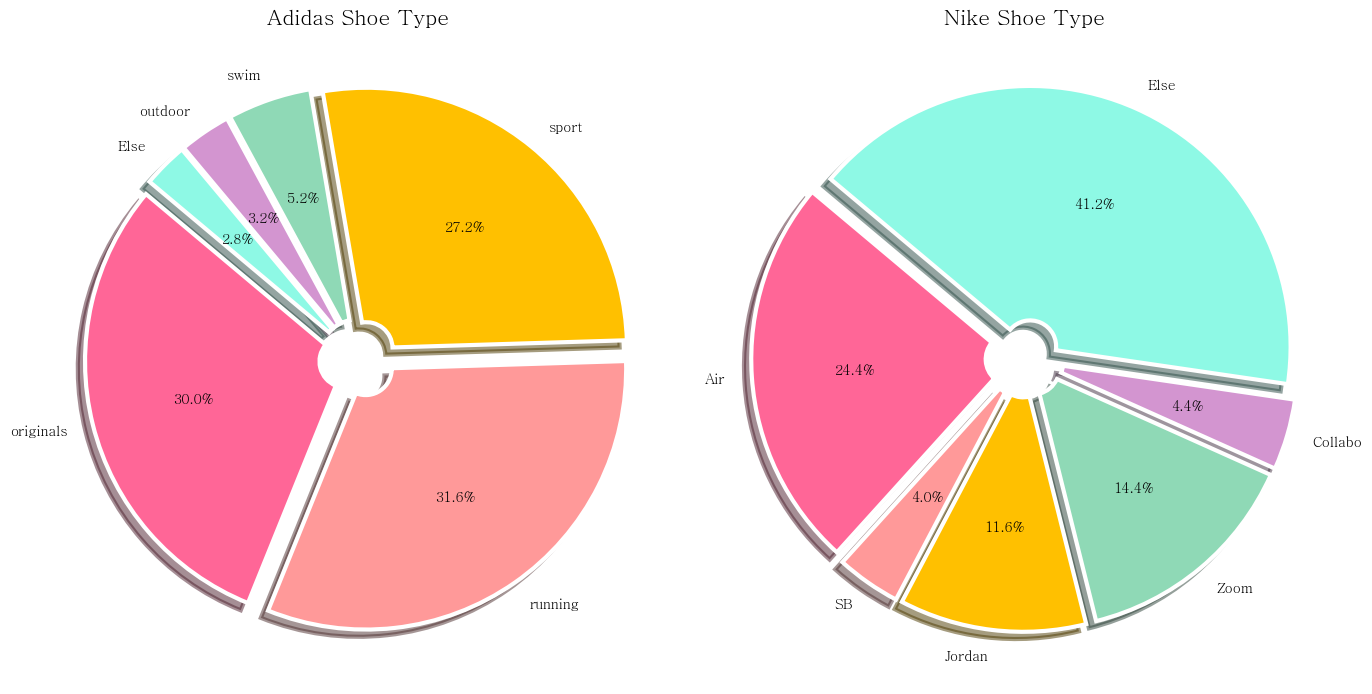

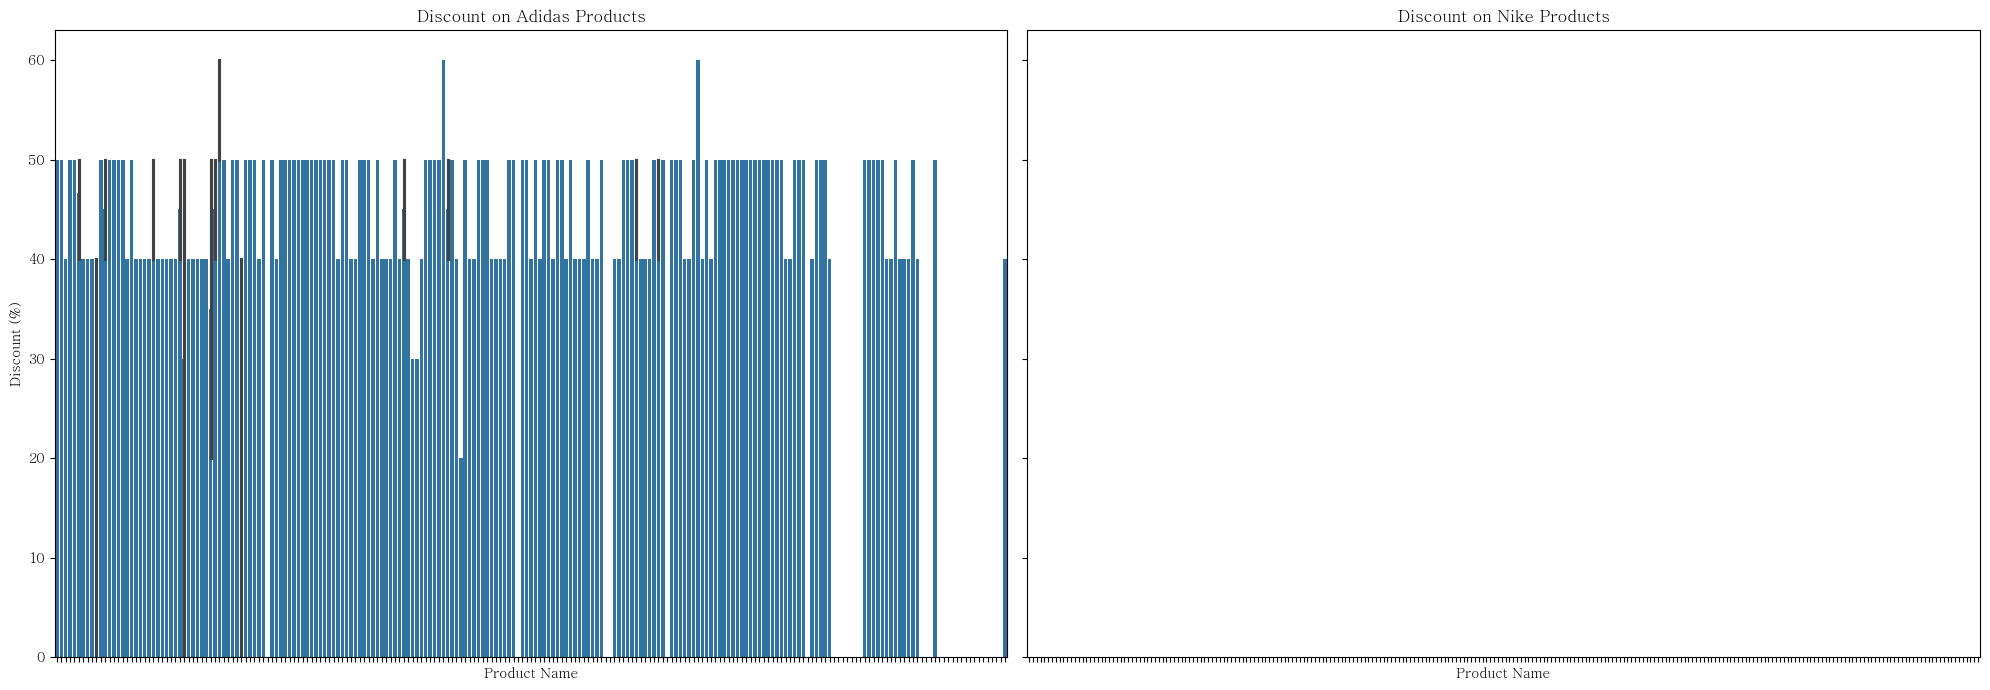

In [111]:
# 환이 모은거
adidas_yh = adidas_drop_duplicated.head(250)                           # 250개 데이터 
adidas_yh = adidas_yh.reset_index(drop=True)

nike_yh = nike_drop_duplicated.head(250)                           # 250개 데이터
nike_yh = nike_yh.reset_index(drop=True)

# 환 아디다스 이름별 구분
# originals
adidas_originals_yh = adidas_yh[adidas_yh['Product Name'].str.contains('originals', case=False)]
adidas_running_yh = adidas_yh[adidas_yh['Product Name'].str.contains('running', case=False)]
adidas_sport_yh = adidas_yh[adidas_yh['Product Name'].str.contains('sport', case=False)]
adidas_swim_yh = adidas_yh[adidas_yh['Product Name'].str.contains('swim', case=False)]
adidas_outdoor_yh = adidas_yh[adidas_yh['Product Name'].str.contains('outdoor', case=False)]

# 그 외 상품들
excluded_adidas_yh = ['originals', 'running', 'sport', 'swim', 'outdoor']
adidas_else_yh = adidas_yh[~adidas_yh['Product Name'].str.contains('|'.join(excluded_adidas_yh), case=False)]

print('\n', f"합: {len(adidas_originals_yh) + len(adidas_running_yh) + len(adidas_sport_yh) + len(adidas_swim_yh) + len(adidas_outdoor_yh) + len(adidas_else_yh)}")

# 나이키 이름별 구분
nike_air_yh = nike_yh[nike_yh['Product Name'].str.contains('air', case=False) &
    ~nike_yh['Product Name'].str.contains('sb', case=False) &
    ~nike_yh['Product Name'].str.contains('jordan', case=False) &
    ~nike_yh['Product Name'].str.contains(' x ', case=False) &
    ~nike_yh['Product Name'].str.contains('zoom', case=False)]

nike_sb_yh = nike_yh[nike_yh['Product Name'].str.contains('sb', case=False)]
nike_jordan_yh = nike_yh[nike_yh['Product Name'].str.contains('jordan', case=False)]
nike_zoom_yh = nike_yh[nike_yh['Product Name'].str.contains('zoom', case=False) & 
    ~nike_yh['Product Name'].str.contains('sb', case=False)]
nike_collaboration_yh = nike_yh[nike_yh['Product Name'].str.contains(' x ', case=False)]
excluded_nike_yh = ['air', 'sb', 'jordan', 'zoom', ' x ']
nike_else_yh = nike_yh[~nike_yh['Product Name'].str.contains('|'.join(excluded_nike_yh), case=False)]

print('\n', f"합: {len(nike_air_yh) + len(nike_sb_yh) + len(nike_jordan_yh) + len(nike_zoom_yh) + len(nike_collaboration_yh) + len(nike_else_yh)}")

# Adidas, Nike 이름별 시각화 자료 #######################################################################################

adidas_counts_yh = {
    'originals': len(adidas_originals_yh),
    'running': len(adidas_running_yh),
    'sport': len(adidas_sport_yh),
    'swim': len(adidas_swim_yh),
    'outdoor': len(adidas_outdoor_yh),
    'Else': len(adidas_else_yh)
}


nike_counts_yh = {
    'Air': len(nike_air_yh),
    'SB': len(nike_sb_yh),
    'Jordan': len(nike_jordan_yh),
    'Zoom': len(nike_zoom_yh),
    'Collabo': len(nike_collaboration_yh),
    'Else': len(nike_else_yh)
}

# 서브 플롯 생성
fig_yh, axs_yh = plt.subplots(1, 2, figsize=(14, 7))

# 아디다스 파이 차트
axs_yh[0].pie(adidas_counts_yh.values(),
              labels=adidas_counts_yh.keys(),
              autopct='%1.1f%%',
              startangle=140,
              explode=[0.05] * len(adidas_counts_yh),
              shadow=True,
              colors=['#ff6697', '#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#8ef9e5'],
              wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 3})
axs_yh[0].set_title('Adidas Shoe Type', fontsize=15)

# 나이키 파이 차트
axs_yh[1].pie(nike_counts_yh.values(),
              labels=nike_counts_yh.keys(),
              autopct='%1.1f%%',
              startangle=140,
              explode=[0.05] * len(nike_counts_yh),
              shadow=True,
              colors=['#ff6697', '#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#8ef9e5'],
              wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 3})
axs_yh[1].set_title('Nike Shoe Type', fontsize=15)


plt.tight_layout()                  # 차트 간 간격 조정
plt.show()

# Adidas, Nike Discount 데이터 볼 수 있게 병합 #######################################################################################

df_adidas_dc_yh = adidas_yh[['Product Name', 'Discount']]
df_nike_dc_yh = nike_yh[['Product Name', 'Discount']]

fig_dc_yh, fig_dc_axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

# Adidas 할인
sns.barplot(ax=fig_dc_axes[0], x='Product Name', y='Discount', data=df_adidas_dc_yh)
fig_dc_axes[0].set_title('Discount on Adidas Products')
fig_dc_axes[0].set_xlabel('Product Name')
fig_dc_axes[0].set_ylabel('Discount (%)')
fig_dc_axes[0].tick_params(axis='x', labelbottom=False)  # X축 레이블 제거

# Nike 할인
sns.barplot(ax=fig_dc_axes[1], x='Product Name', y='Discount', data=df_nike_dc_yh)
fig_dc_axes[1].set_title('Discount on Nike Products')
fig_dc_axes[1].set_xlabel('Product Name')
fig_dc_axes[1].tick_params(axis='x', labelbottom=False)  # X축 레이블 제거

plt.tight_layout()
plt.show()
 #######################################################################################################################################################################

---

### 분석2: 가격별 (진행자: 이세진)

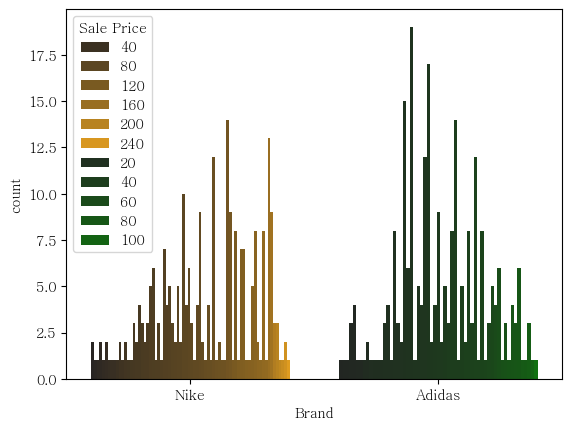

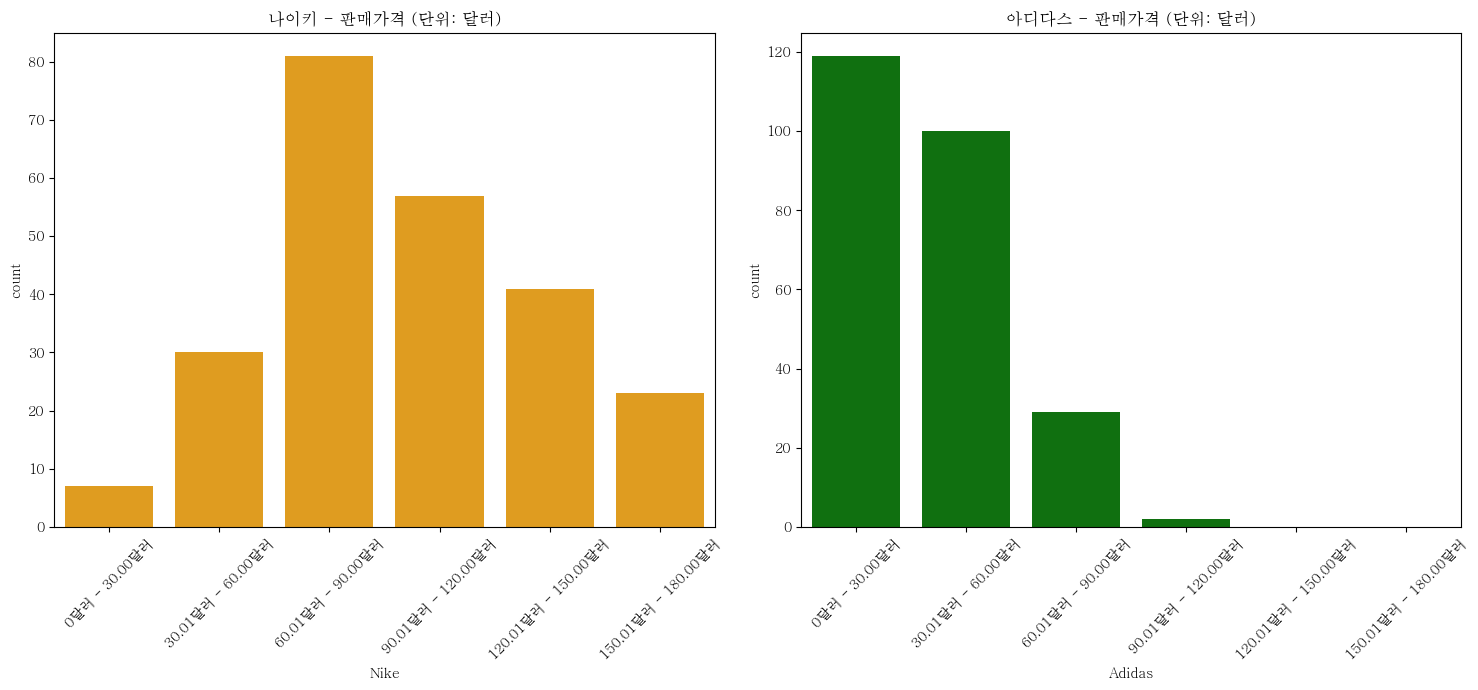

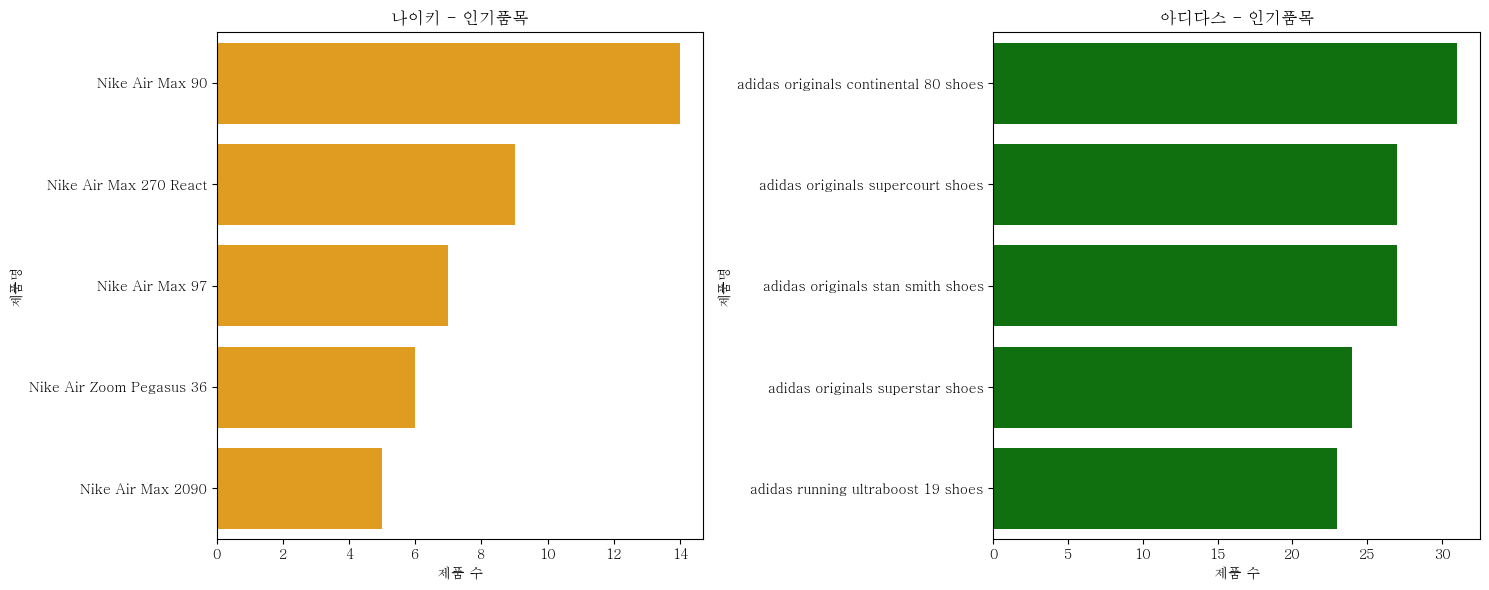

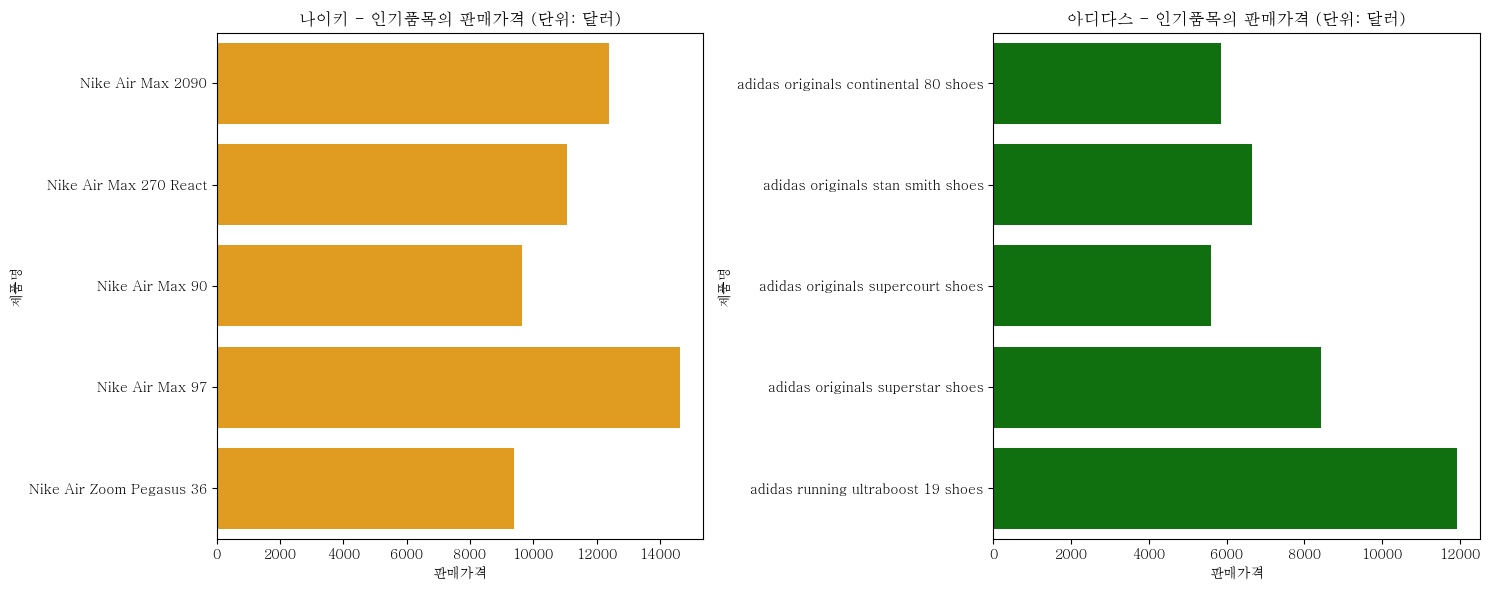

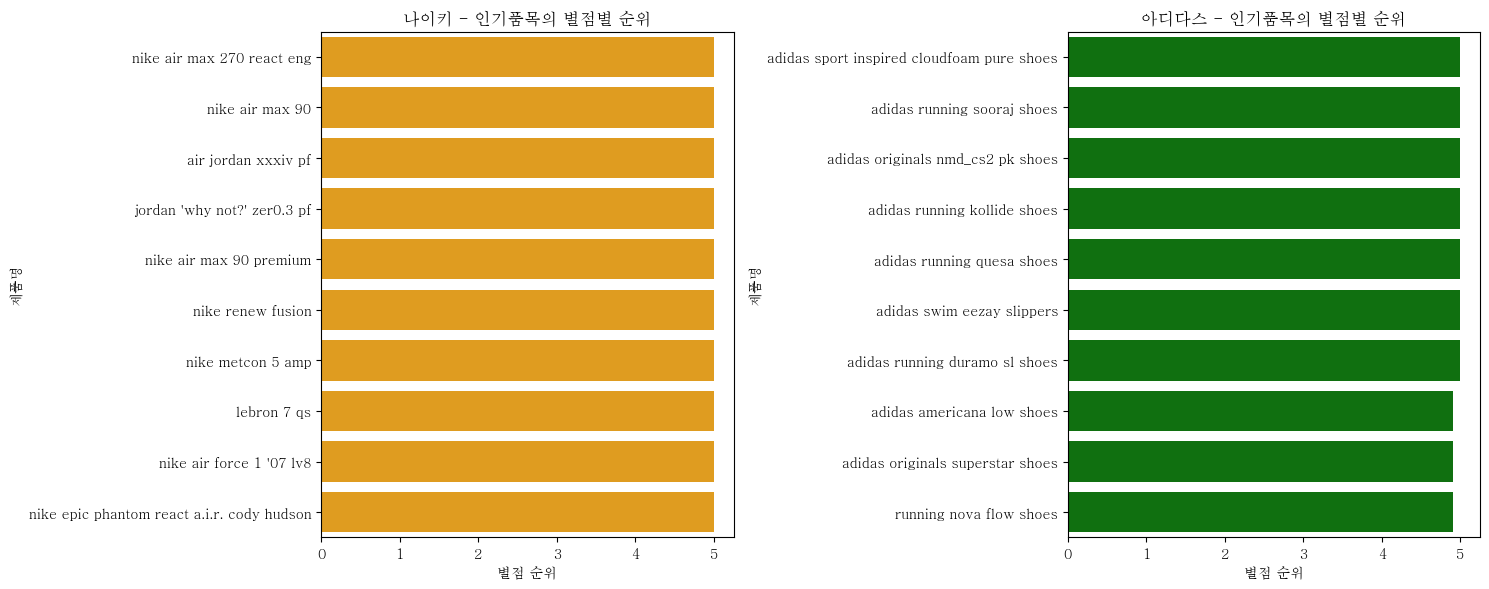

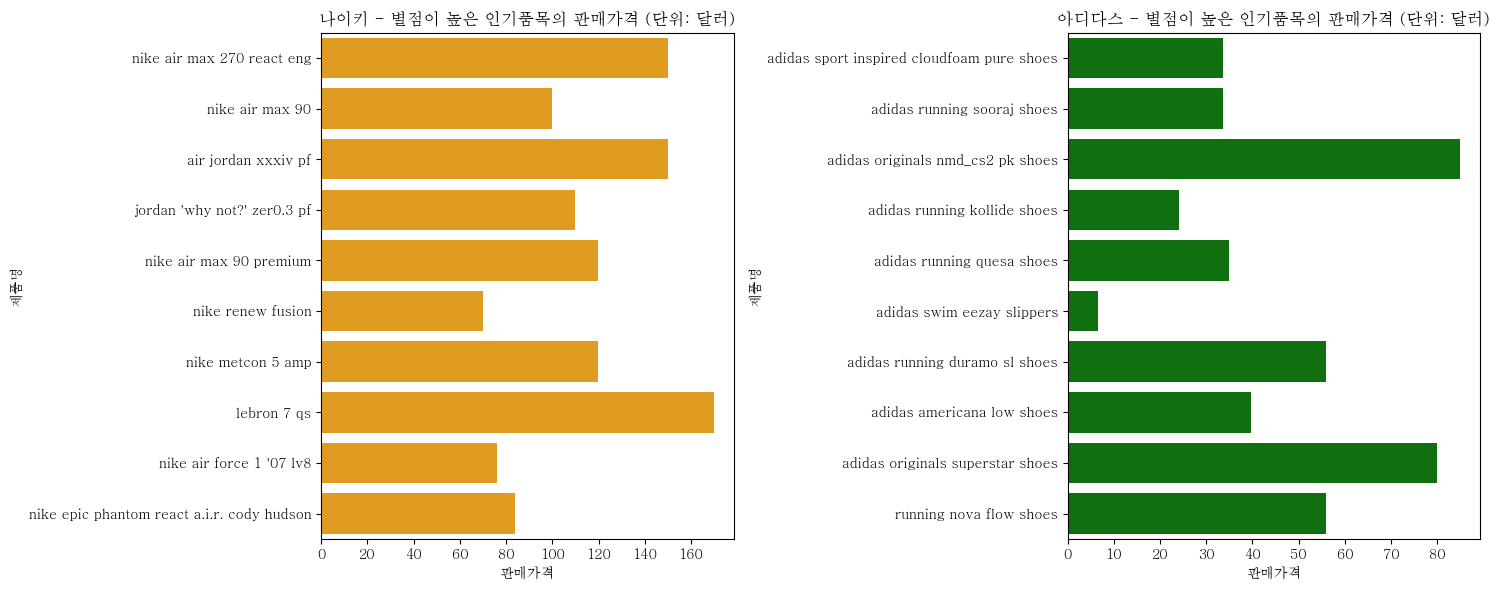

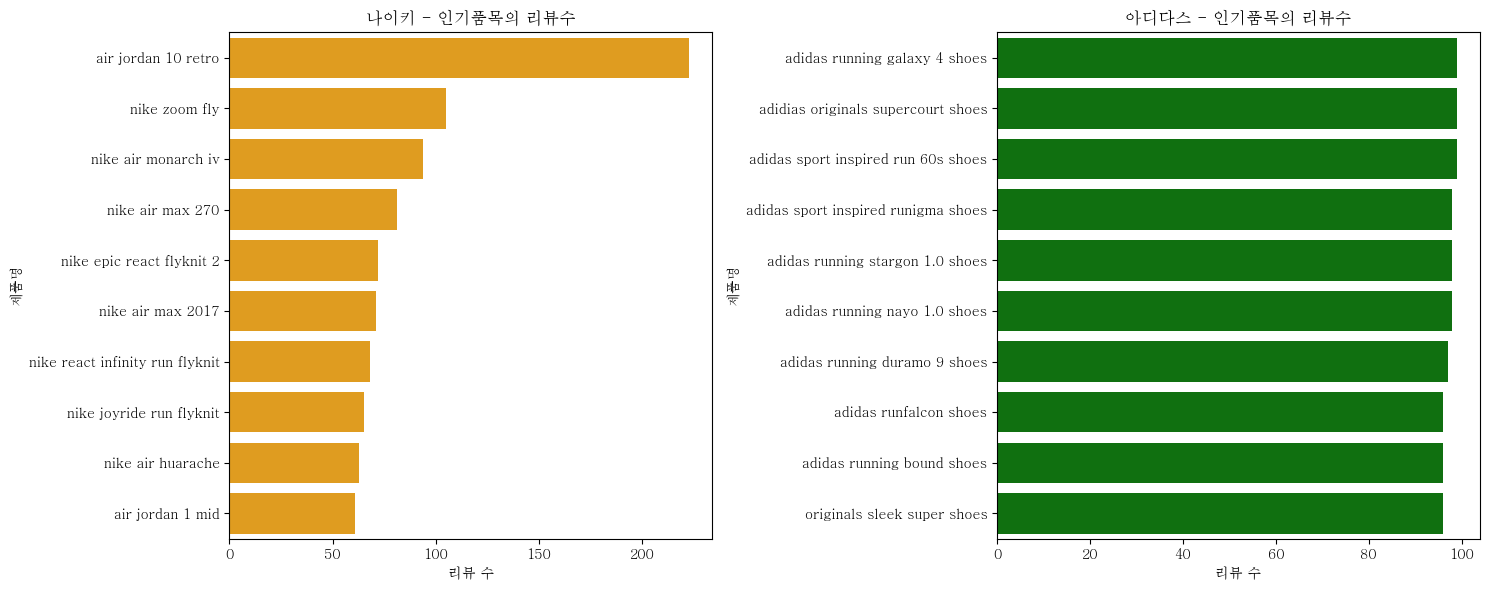

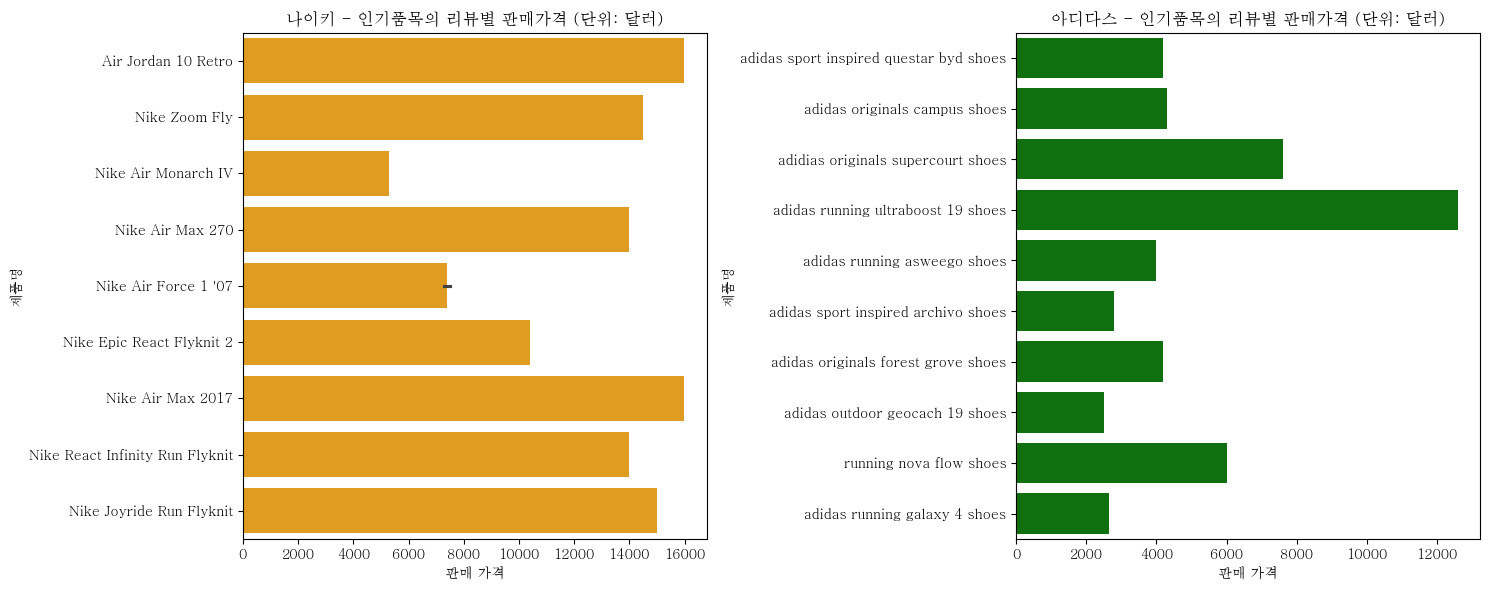

In [132]:
# 세진
# 안녕하세요 나이키와 아디다스를 사랑하는 여러분
# 당신들이 찾는 나이키와 아디다스의 사랑받는 제품들을 모아 찾아드리는 서비스를 도와드리고 있습니다.
# 가장 인기있는 제품들을 소개해드리고, 나이키와 아디다스 제품의 가격들을 알아볼 수 있도록 열거해놨습니다.
# 여러분들이 희망하는 제품이 어떤 것인지 통계를 확인하고 찾아볼 수 있으면 좋겠습니다.

# 카운트, 가격 통계
nike_price_jin = nike_drop_duplicated.sort_values(by='Sale Price', ascending=False)
adidas_price_jin = adidas_noSex.sort_values(by='Sale Price', ascending=False)

sns.countplot(data=nike_price_jin, x='Brand', hue='Sale Price', palette='dark:orange')
sns.countplot(data=adidas_price_jin, x='Brand', hue='Sale Price', palette='dark:green')
plt.show()

# 가격에 대한 카운트 수
# 가격대 구간 생성을 위한 함수
def create_price_range(price):
    if pd.isna(price) or price == 0:
        return '가격정보 없음'
    elif price <= 30:
        return '0달러 - 30.00달러'
    elif price <= 60:
        return '30.01달러 - 60.00달러'
    elif price <= 90:
        return '60.01달러 - 90.00달러'
    elif price <= 120:
        return '90.01달러 - 120.00달러'
    elif price <= 150:
        return '120.01달러 - 150.00달러'
    elif price <= 180:
        return '150.01달러 - 180.00달러'
    else:
        return '180.00달러 이상'

# 각 브랜드별로 가격대 범주 생성
nike_price_jin['Nike'] = nike_price_jin['Sale Price'].apply(create_price_range)
adidas_price_jin['Adidas'] = adidas_price_jin['Sale Price'].apply(create_price_range)

# 그래프 생성
plt.figure(figsize=(15, 7))

# Nike 판매가격 분포
plt.subplot(1, 2, 1)
sns.countplot(data=nike_price_jin, x='Nike', order=['0달러 - 30.00달러', '30.01달러 - 60.00달러', 
              '60.01달러 - 90.00달러', '90.01달러 - 120.00달러', '120.01달러 - 150.00달러', '150.01달러 - 180.00달러'], color='orange')
plt.title('나이키 - 판매가격 (단위: 달러)')
plt.xticks(rotation=45)

# Adidas 판매가격 분포
plt.subplot(1, 2, 2)
sns.countplot(data=adidas_price_jin, x='Adidas', order=['0달러 - 30.00달러', '30.01달러 - 60.00달러', 
              '60.01달러 - 90.00달러', '90.01달러 - 120.00달러', '120.01달러 - 150.00달러', '150.01달러 - 180.00달러'], color='green')
plt.title('아디다스 - 판매가격 (단위: 달러)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


########################################################################################
adidas_duplicated_noSex = adidas.copy()
def remove_sex(text):
        words = text.split()
        if any(gender in words[0].upper() for gender in ["WOMEN'S", "MEN'S", "UNISEX"]):
            return ' '.join(words[1:]).lower()  # 성별 표시 제거

# DataFrame의 'Product Name' 열에 적용
adidas_duplicated_noSex['Product Name'] = adidas_duplicated_noSex['Product Name'].apply(remove_sex)
########################################################################################

# 인기있는 제품 순위

# 브랜드별 Product Name count 계산
nike_top5_jin = nike['Product Name'].value_counts().head()
adidas_top5_jin = adidas_duplicated_noSex['Product Name'].value_counts().head()

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x=nike_top5_jin.values, y=nike_top5_jin.index, color='orange')
plt.title('나이키 - 인기품목')
plt.xlabel('제품 수')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x=adidas_top5_jin.values, y=adidas_top5_jin.index, color='green')
plt.title('아디다스 - 인기품목')
plt.xlabel('제품 수')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()

# 인기있는 제품의 가격

# 브랜드별 Product Name count 계산
nike_top5_jin = nike['Product Name'].value_counts().head()
adidas_top5_jin = adidas_duplicated_noSex['Product Name'].value_counts().head()

# 나이키 상위 5개 제품의 가격 정보 추출
nike_top5_prices_jin = nike[nike['Product Name'].isin(nike_top5_jin.index)].groupby('Product Name')['Sale Price'].mean()

# 아디다스 상위 5개 제품의 가격 정보 추출
adidas_top5_prices_jin = adidas_duplicated_noSex[adidas_duplicated_noSex['Product Name'].isin(adidas_top5_jin.index)].groupby('Product Name')['Sale Price'].mean()

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x=nike_top5_prices_jin.values, y=nike_top5_prices_jin.index, color='orange')
plt.title('나이키 - 인기품목의 판매가격 (단위: 달러)')
plt.xlabel('판매가격')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x=adidas_top5_prices_jin.values, y=adidas_top5_prices_jin.index, color='green')
plt.title('아디다스 - 인기품목의 판매가격 (단위: 달러)')
plt.xlabel('판매가격')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()

# 별점이 높은 제품

# 브랜드별 Product Name count 계산
nike_top5_rating_jin = nike_drop_duplicated.sort_values('Rating', ascending=False).head(10)
adidas_top5_rating_jin = adidas_noSex.sort_values('Rating', ascending=False).head(10)

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x='Rating', y='Product Name', data=nike_top5_rating_jin, color='orange')
plt.title('나이키 - 인기품목의 별점별 순위')
plt.xlabel('별점 순위')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x='Rating', y='Product Name', data=adidas_top5_rating_jin, color='green')
plt.title('아디다스 - 인기품목의 별점별 순위')
plt.xlabel('별점 순위')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()

# 별점이 높은 제품의 가격 -> 별점은 nike가 20개 이상 5점이기 때문에 5점짜리로 확인한다.

# 브랜드별 Product Name count 계산
nike_top5_rating_jin = nike_drop_duplicated.sort_values('Rating', ascending=False).head(10)
adidas_top5_rating_jin = adidas_noSex.sort_values('Rating', ascending=False).head(10)

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x='Sale Price', y='Product Name', data=nike_top5_rating_jin, color='orange')
plt.title('나이키 - 별점이 높은 인기품목의 판매가격 (단위: 달러)')
plt.xlabel('판매가격')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x='Sale Price', y='Product Name', data=adidas_top5_rating_jin, color='green')
plt.title('아디다스 - 별점이 높은 인기품목의 판매가격 (단위: 달러)')
plt.xlabel('판매가격')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()

# 리뷰가 많은 제품

# 브랜드별 Product Name count 계산
nike_top5_review_jin = nike_drop_duplicated.sort_values('Reviews', ascending=False).head(10)
adidas_top5_review_jin = adidas_noSex.sort_values('Reviews', ascending=False).head(10)

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x='Reviews', y='Product Name', data=nike_top5_review_jin, color='orange')
plt.title('나이키 - 인기품목의 리뷰수')
plt.xlabel('리뷰 수')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x='Reviews', y='Product Name', data=adidas_top5_review_jin, color='green')
plt.title('아디다스 - 인기품목의 리뷰수')
plt.xlabel('리뷰 수')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()

# 리뷰가 많은 제품의 가격

# 브랜드별 Product Name count 계산
nike_top5_review_jin = nike.sort_values('Reviews', ascending=False).head(10)
adidas_top5_review_jin = adidas_duplicated_noSex.sort_values('Reviews', ascending=False).head(10)

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x='Sale Price', y='Product Name', data=nike_top5_review_jin, color='orange')
plt.title('나이키 - 인기품목의 리뷰별 판매가격 (단위: 달러)')
plt.xlabel('판매 가격')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x='Sale Price', y='Product Name', data=adidas_top5_review_jin, color='green')
plt.title('아디다스 - 인기품목의 리뷰별 판매가격 (단위: 달러)')
plt.xlabel('판매 가격')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()



---

### 분석3: 할인가격별 (진행자: 이윤재)

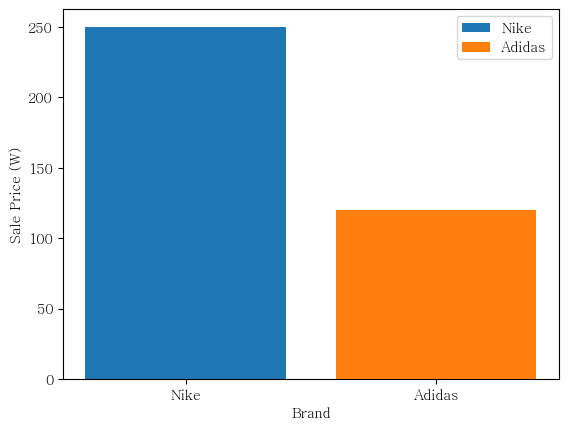

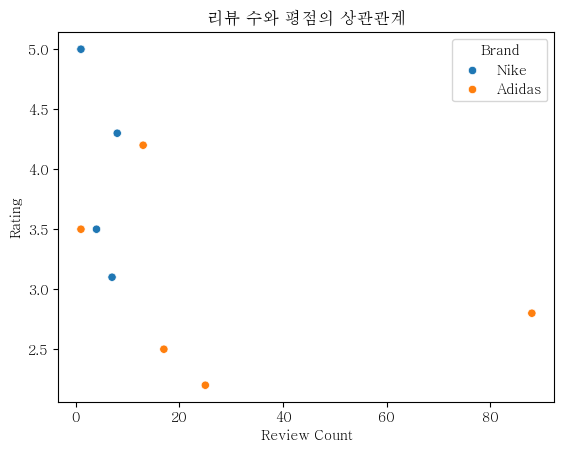

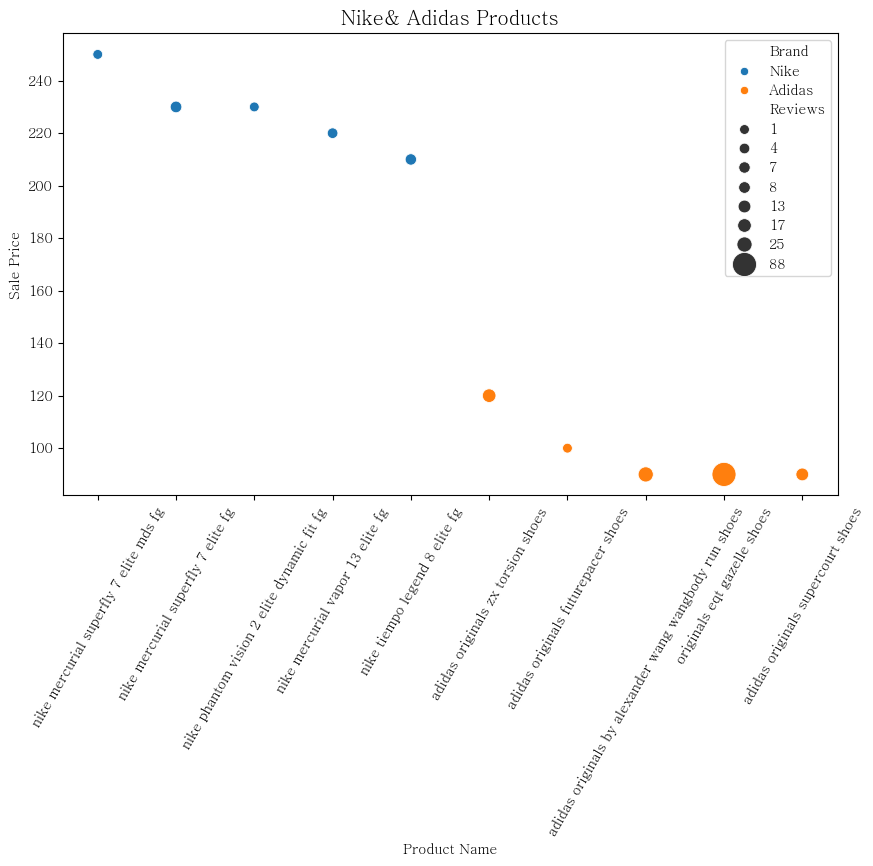

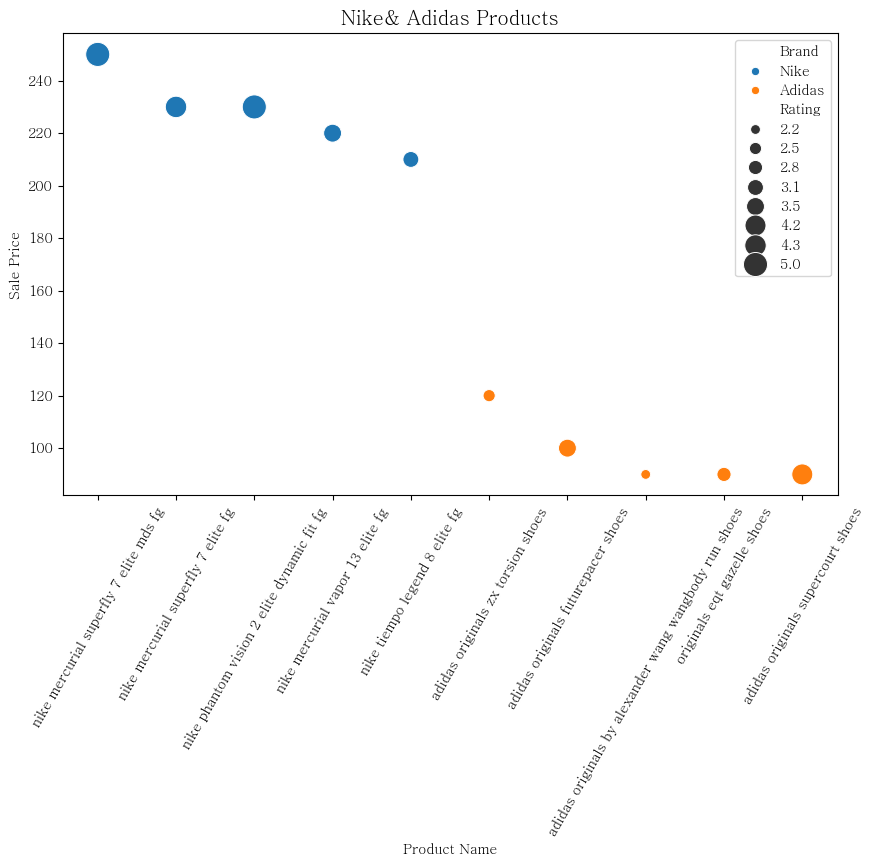

In [113]:
# 윤재
# 2개 다 nike_drop_duplicated, adidas_drop_duplicated 병합 (시각화자료에 사용)
df_concat_jae = pd.concat([nike_drop_duplicated, adidas_drop_duplicated], axis=0,ignore_index = True)
df_concat_jae.groupby('Product Name')['Listing Price'].max()

# 나이키와 아디다스 할인 가격 범위 비교
plt.bar(nike_drop_duplicated['Brand'],nike_drop_duplicated['Sale Price'], label = 'Nike')  # 249.95달러 
plt.bar(adidas_drop_duplicated['Brand'], adidas_drop_duplicated['Sale Price'],label='Adidas')   # 119.99달러
 
plt.xlabel('Brand')
plt.ylabel('Sale Price (W)')
plt.legend()

plt.show()

# 리뷰 수가 많은 신발 중 할인 가격
review_filter_jae = df_concat_jae[df_concat_jae['Reviews'] != 0]
nike_sorted_df_jae = review_filter_jae[review_filter_jae['Brand'] == 'Nike'] \
                    .sort_values(['Sale Price', 'Product ID'], ascending=[False, True])
nike_head_jae = nike_sorted_df_jae.head()

adidas_sorted_df_jae = review_filter_jae[review_filter_jae['Brand'] == 'Adidas'] \
                    .sort_values(['Sale Price', 'Product ID'], ascending=[False, True])
adidas_head_jae = adidas_sorted_df_jae.head()
adidas_head_jae

# head 데이터 병합
head_concat_jae = pd.concat([nike_head_jae, adidas_head_jae], axis =0, ignore_index=True)
head_concat_jae

# 리뷰수와 평점의 상관관계

sns.scatterplot(data= head_concat_jae,
                x= 'Reviews',
                y = 'Rating', 
                hue='Brand')

plt.title('리뷰 수와 평점의 상관관계')
plt.xlabel('Review Count')
plt.ylabel('Rating')

plt.show()

# 그래프 (점의 크기에 따른 리뷰의 수 확인 가능 )

plt.figure(figsize=(10,6))

sns.scatterplot(data= head_concat_jae,
                x='Product Name', 
                y= 'Sale Price',
                hue = 'Brand',
                size='Reviews', 
                sizes=(50,300),
                legend='full')
plt.xticks(rotation=60)

plt.title('Nike& Adidas Products', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Sale Price')

plt.show()

# 할인 가격에 따른 평점 확인
plt.figure(figsize=(10,6))

sns.scatterplot(data= head_concat_jae,
                x='Product Name', 
                y= 'Sale Price',
                hue = 'Brand',
                size='Rating', 
                sizes=(50,300),
                legend='full')
plt.xticks(rotation=60)

plt.title('Nike& Adidas Products', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Sale Price')

plt.show()



---

### 분석4: 인기순위별 (진행자: 조이현)

In [114]:
# 평점별 리뷰수 정렬: 나이키 제품명
# nike_drop_duplicated → hyun_nike로 전처리 완료

hyun_nike = nike_drop_duplicated.sort_values(by=['Rating', 'Reviews'], ascending=[False, False])

# len(hyun_nike[hyun_nike['Discount'] == 0])                          # 모든 제품에 할인이 없는 것을 발견
hyun_nike = hyun_nike.drop(columns='Discount')                      # 그럼에도 정가와 판매가가 다르므로 'Discount' column을 고려하지 않도록 함

hyun_nike = hyun_nike.reset_index(drop=True)                        # 기존 인덱스 삭제 후 재정렬
hyun_nike

,Product Name,Product ID,Listing Price,Sale Price,Brand,Rating,Reviews
0,nike air max 90,CD0490-104,0.00,99.95,Nike,5.0,9
1,nike air zoom wildhorse 5,AQ2222-200,0.00,89.95,Nike,5.0,6
2,nike air max 720 (obj),CK2531-001,169.95,135.97,Nike,5.0,5
3,nike air zoom pegasus 36 premium rise,AV6259-500,109.95,65.97,Nike,5.0,5
4,nike air max 720 waves,BQ4430-400,159.95,111.97,Nike,5.0,4
...,...,...,...,...,...,...,...
245,jordan proto-lyte,AT3381-008,79.95,63.97,Nike,2.4,5
246,nike blazer low qs flyleather with at least 50...,CI5546-100,0.00,64.95,Nike,2.0,2
247,nike tiempo legend 8 academy mg,AT5292-606,0.00,64.95,Nike,2.0,1
248,nike tiempo legend 8 club ic,AT6110-004,44.95,31.47,Nike,2.0,1


In [115]:
# 평점별 리뷰수 정렬: 아디다스 제품명
# adidas_noSex → hyun_adidas로 전처리 완료

hyun_adidas = adidas_noSex.sort_values(by=['Rating', 'Reviews'], ascending=[False, False])

hyun_adidas = hyun_adidas.drop(columns='Discount')                  # nike와 동일 조건을 맞추기 위해 'Discount' column을 고려하지 않도록 함

hyun_adidas = hyun_adidas.reset_index(drop=True)                    # 기존 인덱스 삭제 후 재정렬
hyun_adidas

,Product Name,Product ID,Listing Price,Sale Price,Brand,Rating,Reviews
0,adidas running sooraj shoes,EE9932,55.99,33.59,Adidas,5.0,75
1,adidas swim eezay slippers,CL0243,12.99,6.49,Adidas,5.0,60
2,adidas originals nmd_cs2 pk shoes,CQ2039,169.99,84.99,Adidas,5.0,56
3,adidas running kollide shoes,CL7551,47.99,23.99,Adidas,5.0,54
4,adidas running duramo sl shoes,FV8794,55.99,55.99,Adidas,5.0,44
...,...,...,...,...,...,...,...
245,adidas toe side ii slippers,CM0068,12.99,7.79,Adidas,1.5,59
246,adidas outdoor hoist 2019 sandals,CK9843,27.99,16.79,Adidas,1.5,47
247,adidas originals adi-ease shoes,DB3114,75.99,37.99,Adidas,1.5,47
248,adidas sports inspired lite racer shoes,EE8252,42.99,21.49,Adidas,1.5,6


In [116]:
# 평점별 정렬: 나이키 제품들 평균 리뷰 수
# hyun_nike_reset → hyun_nike_rating_reviews_mean으로 DataFrame 유지하며 평점 내림차순 정렬

hyun_nike_rating_reviews_mean = hyun_nike.groupby('Rating')['Reviews'].mean().to_frame().sort_values(by='Rating', ascending=False)
hyun_nike_rating_reviews_mean = hyun_nike_rating_reviews_mean.reset_index()     # reset_index() 선언으로 Rating을 컬럼으로 밀어넣기
hyun_nike_rating_reviews_mean

,Rating,Reviews
0,5.0,1.756410
1,4.9,7.333333
2,4.8,8.000000
3,4.7,31.300000
4,4.6,18.250000
5,4.5,15.117647
6,4.4,16.400000
7,4.3,16.833333
8,4.2,15.272727
9,4.1,34.142857


In [117]:
# 평점별 정렬: 아디다스 제품들 평균 리뷰 수
# hyun_adidas_reset → hyun_adidas_rating_reviews_mean으로 DataFrame 유지하며 평점 내림차순 정렬

hyun_adidas_rating_reviews_mean = hyun_adidas.groupby('Rating')['Reviews'].mean().to_frame().sort_values(by='Rating', ascending=False)
hyun_adidas_rating_reviews_mean = hyun_adidas_rating_reviews_mean.reset_index()     # reset_index() 선언으로 Rating을 컬럼으로 밀어넣기
hyun_adidas_rating_reviews_mean

,Rating,Reviews
0,5.0,47.857143
1,4.9,46.250000
2,4.8,28.000000
3,4.7,52.000000
4,4.6,41.714286
5,4.5,45.200000
6,4.4,50.769231
7,4.3,54.444444
8,4.2,58.300000
9,4.1,56.000000


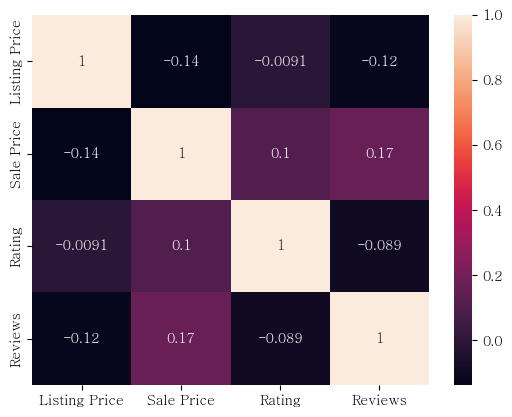

In [118]:
# 음의 상관관계는 평균적으로 평점이 높을수록 리뷰는 적게 달릴 가능성을 시사한다.
# 그러나, 나이키 제품의 평점과 리뷰는 매우 약한 상관관계를 가지고 있다.
# 따라서, EDA 진행에 있어서 평점을 절대적으로 우선시하도록 한다.

hyun_nike_reset_heatmap = hyun_nike.corr(numeric_only=True)
hyun_nike_reset_heatmap

sns.heatmap(hyun_nike_reset_heatmap, annot=True)
plt.show()

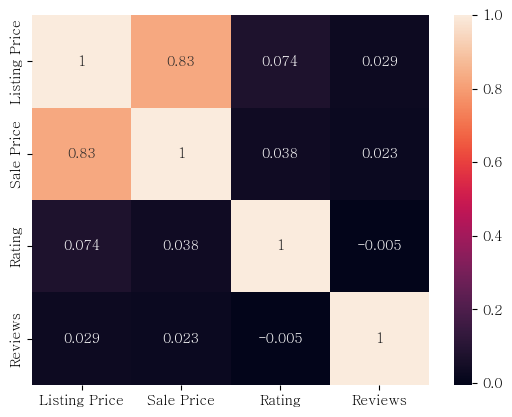

In [119]:
# 음의 상관관계는 평균적으로 평점이 높을수록 리뷰는 적게 달릴 가능성을 시사한다.
# 그러나, 아디다스 제품의 평점과 리뷰는 매우 약한 상관관계를 가지고 있다.
# 따라서, EDA 진행에 있어서 평점을 절대적으로 우선시하도록 한다.

hyun_adidas_reset_heatmap = hyun_adidas.corr(numeric_only=True)
hyun_adidas_reset_heatmap

sns.heatmap(hyun_adidas_reset_heatmap, annot=True)
plt.show()

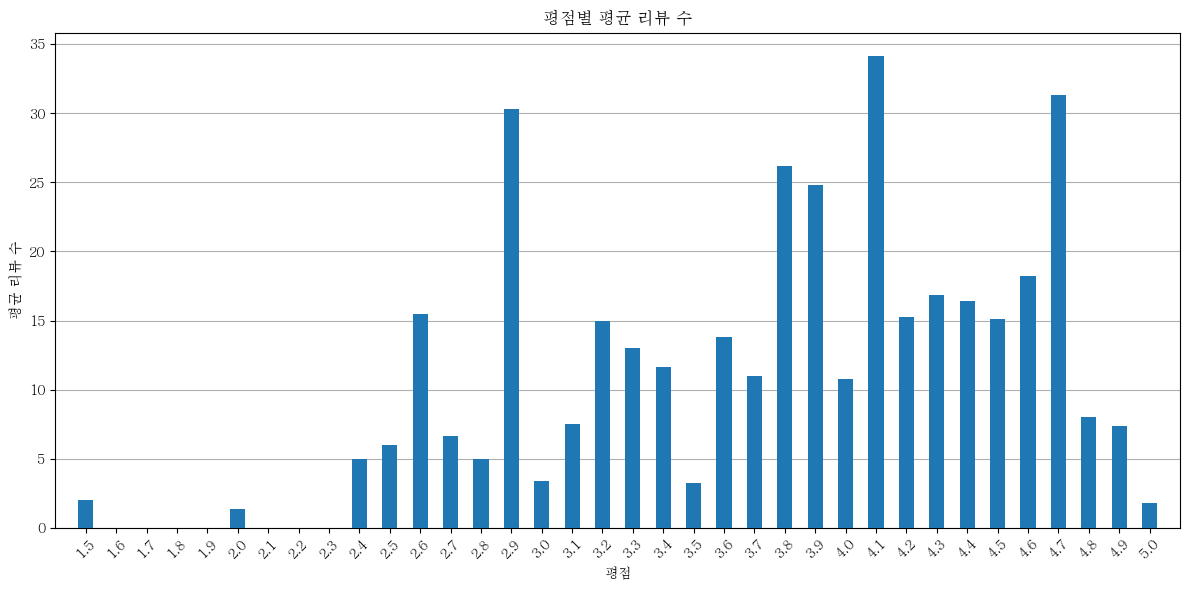

In [120]:
# 평점별 정렬: 나이키 제품들 평균 리뷰 수 (시각화)
# 나이키 제품 구매자들은 아디다스 제품 구매자들보다 리뷰 수가 상대적으로 적다.
# 리뷰 수를 비교적 덜 고려하는 경우, 나이키 제품이 조금 더 적합하다.

plt.figure(figsize=(12, 6))                         # 그래프 크기 조정
x_range = np.arange(1.5, 5.1, 0.1)                  # x축 범위 생성 (1.5부터 5.0까지 0.1 간격)
plt.bar(hyun_nike_rating_reviews_mean['Rating'], hyun_nike_rating_reviews_mean['Reviews'], width=0.05, zorder=5)
plt.title('평점별 평균 리뷰 수')
plt.xlabel('평점')
plt.ylabel('평균 리뷰 수')

plt.xticks(x_range, rotation=45)                    # x축 눈금 및 레이블 설정, 회전 추가
plt.xlim(1.4,5.1)                                   # x축 범위 명시적으로 설정
plt.grid(axis='y', zorder=1)
plt.tight_layout()
plt.show()

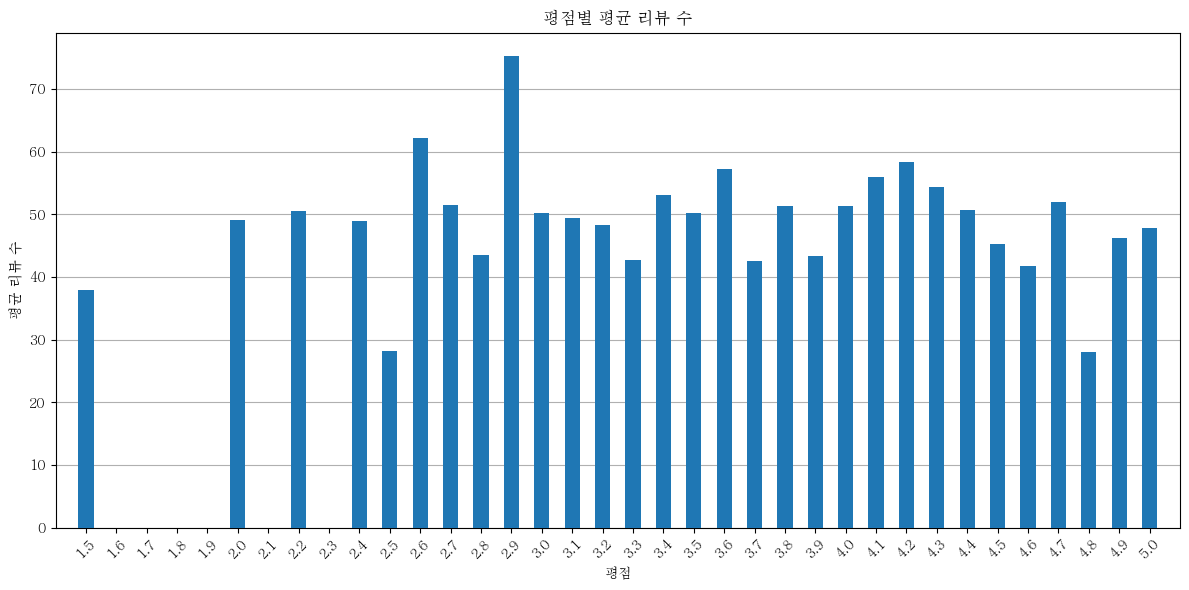

In [121]:
# 평점별 정렬: 아디다스 제품들 평균 리뷰 수 (시각화)
# 아디다스 제품 구매자들은 나이키 제품 구매자들보다 리뷰 수가 상대적으로 많다.
# 리뷰 수를 비교적 더 고려하는 경우, 아디다스 제품이 조금 더 적합하다.

plt.figure(figsize=(12, 6))                         # 그래프 크기 조정
x_range = np.arange(1.5, 5.1, 0.1)                  # x축 범위 생성 (1.5부터 5.0까지 0.1 간격)
plt.bar(hyun_adidas_rating_reviews_mean['Rating'], hyun_adidas_rating_reviews_mean['Reviews'], width=0.05, zorder=5)
plt.title('평점별 평균 리뷰 수')
plt.xlabel('평점')
plt.ylabel('평균 리뷰 수')

plt.xticks(x_range, rotation=45)                    # x축 눈금 및 레이블 설정, 회전 추가
plt.xlim(1.4,5.1)                                   # x축 범위 명시적으로 설정
plt.grid(axis='y', zorder=1)
plt.tight_layout()
plt.show()

---

In [122]:
# 리뷰 수를 비교적 더 고려하여, 아디다스 제품을 제시
# 정가보다 판매가가 적을 경우, 할인으로 판단하여 조건설정
# 남성 페르소나의 예산에 기반하여 할인가 400달러 이하로 조건설정
# 리뷰가 하나인 제품 제외 조건설정

In [123]:
# 시각화 자료를 기반으로 평점 4.0 이상 조건일 때, 평균 리뷰수가 가장 많은 제품의 평점은 4.2점

hyun_adidas_rating_four_two = hyun_adidas[(hyun_adidas['Listing Price'] > hyun_adidas['Sale Price']) & (400 >= hyun_adidas['Sale Price']) & (hyun_adidas['Reviews'] != 1) & (hyun_adidas['Rating'] == 4.2)]
hyun_adidas_rating_four_two

,Product Name,Product ID,Listing Price,Sale Price,Brand,Rating,Reviews
63,adidas running stargon 1.0 shoes,CL7482,45.99,22.99,Adidas,4.2,98
64,adidas sport inspired archivo shoes,EF0437,55.99,33.59,Adidas,4.2,89
65,adidas sport inspired videll shoes,CL7366,37.99,22.79,Adidas,4.2,84
66,adidas originals eqt adv racing shoes,B37090,99.99,49.99,Adidas,4.2,81
67,adidas sport inspired crazychaos shoes,EF1053,69.99,41.99,Adidas,4.2,70
68,adidas running edge pr shoes,AC8122,79.99,39.99,Adidas,4.2,66
69,adidas originals skateboarding adi-ease shoes,EE7292,55.99,33.59,Adidas,4.2,38
70,adidas originals continental vulc shoes,EF9315,65.99,39.59,Adidas,4.2,35
72,adidas sport inspired qt racer shoes,EE8088,45.99,27.59,Adidas,4.2,9


In [124]:
# 시각화 자료를 기반으로 평점 4.5 이상 조건일 때, 평균 리뷰수가 가장 많은 제품의 평점은 4.7점

hyun_adidas_rating_four_seven = hyun_adidas[(hyun_adidas['Listing Price'] > hyun_adidas['Sale Price'])& (400 >= hyun_adidas['Sale Price']) & (hyun_adidas['Reviews'] != 1) & (hyun_adidas['Rating'] == 4.7) ]
hyun_adidas_rating_four_seven

,Product Name,Product ID,Listing Price,Sale Price,Brand,Rating,Reviews
23,adidas originals nmd_r1 stlt primeknit shoes,CQ2030,159.99,79.99,Adidas,4.7,82
24,adidas running raddis 1.0 shoes,CL7467,55.99,27.99,Adidas,4.7,57
25,adidas running cyberg 1.0 shoes,CL7321,35.99,21.59,Adidas,4.7,53
27,adidas sport inspired lite racer slip-ons,F36675,39.99,23.99,Adidas,4.7,45
28,adidas runfalcon shoes,F36217,49.99,24.99,Adidas,4.7,24


In [125]:
# 별점 5.0의 제품을 고려할 경우

hyun_adidas_rating_five_zero = hyun_adidas[(hyun_adidas['Listing Price'] > hyun_adidas['Sale Price']) & (400 >= hyun_adidas['Sale Price']) & (hyun_adidas['Reviews'] != 1) & (hyun_adidas['Rating'] == 5.0)]
hyun_adidas_rating_five_zero

,Product Name,Product ID,Listing Price,Sale Price,Brand,Rating,Reviews
0,adidas running sooraj shoes,EE9932,55.99,33.59,Adidas,5.0,75
1,adidas swim eezay slippers,CL0243,12.99,6.49,Adidas,5.0,60
2,adidas originals nmd_cs2 pk shoes,CQ2039,169.99,84.99,Adidas,5.0,56
3,adidas running kollide shoes,CL7551,47.99,23.99,Adidas,5.0,54
5,adidas running quesa shoes,B96519,69.99,34.99,Adidas,5.0,31
6,adidas sport inspired cloudfoam pure shoes,F34485,55.99,33.59,Adidas,5.0,15


In [126]:
# 추천제품목록 선별작업
# 각 항목당 상위 3개의 제품들을 선별하여 평점별 리뷰수로 내림차순 정렬 후 인덱스 재정렬

hyun_adidas_list = pd.concat([hyun_adidas_rating_four_two.head(3), hyun_adidas_rating_four_seven.head(3), hyun_adidas_rating_five_zero.head(3)]).sort_values(by=['Rating', 'Reviews'], ascending=[False, False]).reset_index(drop=True)
hyun_list = [_ for _ in range(1, 10)]
hyun_adidas_list.insert(0, 'Recommended Ranking', hyun_list)
hyun_adidas_list

,Recommended Ranking,Product Name,Product ID,Listing Price,Sale Price,Brand,Rating,Reviews
0,1,adidas running sooraj shoes,EE9932,55.99,33.59,Adidas,5.0,75
1,2,adidas swim eezay slippers,CL0243,12.99,6.49,Adidas,5.0,60
2,3,adidas originals nmd_cs2 pk shoes,CQ2039,169.99,84.99,Adidas,5.0,56
3,4,adidas originals nmd_r1 stlt primeknit shoes,CQ2030,159.99,79.99,Adidas,4.7,82
4,5,adidas running raddis 1.0 shoes,CL7467,55.99,27.99,Adidas,4.7,57
5,6,adidas running cyberg 1.0 shoes,CL7321,35.99,21.59,Adidas,4.7,53
6,7,adidas running stargon 1.0 shoes,CL7482,45.99,22.99,Adidas,4.2,98
7,8,adidas sport inspired archivo shoes,EF0437,55.99,33.59,Adidas,4.2,89
8,9,adidas sport inspired videll shoes,CL7366,37.99,22.79,Adidas,4.2,84


---

In [127]:
# 리뷰 수를 비교적 덜 고려하여, 나이키 제품을 제시
# 정가보다 판매가가 적을 경우, 할인으로 판단하여 조건설정
# 여성 페르소나의 예산에 기반하여 할인가 200달러 이하로 조건설정
# 리뷰가 하나인 제품 제외 조건설정

In [128]:
# 시각화 자료를 기반으로 평점 4.0 이상 조건일 때, 평균 리뷰수가 가장 많은 제품의 평점은 4.1점

hyun_nike_rating_four_one = hyun_nike[(hyun_nike['Listing Price'] > hyun_nike['Sale Price']) & (200 >= hyun_nike['Sale Price']) & (hyun_nike['Reviews'] != 1) & (hyun_nike['Rating'] == 4.1)]
hyun_nike_rating_four_one

,Product Name,Product ID,Listing Price,Sale Price,Brand,Rating,Reviews
168,nike epic react flyknit 2,BQ8928-011,129.95,103.97,Nike,4.1,72
170,nike air force 1 gore-tex ®,CK2630-700,129.95,90.97,Nike,4.1,18
171,air jordan xxxiii,AQ8830-016,189.95,151.97,Nike,4.1,17
172,nike zoom pegasus turbo shield,BQ1896-002,179.95,125.97,Nike,4.1,11
173,nike benassi jdi floral,618919-031,29.95,23.97,Nike,4.1,8


In [129]:
# 시각화 자료를 기반으로 평점 4.5 이상 조건일 때, 평균 리뷰수가 가장 많은 제품의 평점은 4.7점

hyun_nike_rating_four_seven = hyun_nike[(hyun_nike['Listing Price'] > hyun_nike['Sale Price']) & (200 >= hyun_nike['Sale Price']) & (hyun_nike['Reviews'] != 1) & (hyun_nike['Rating'] == 4.7)]
hyun_nike_rating_four_seven

,Product Name,Product ID,Listing Price,Sale Price,Brand,Rating,Reviews
92,lebron 16 low,CI2668-004,139.95,111.97,Nike,4.7,17
93,nike p-6000 icon clash,BV1021-007,79.95,55.97,Nike,4.7,10
95,nike air zoom pegasus 36,BV5739-500,109.95,76.97,Nike,4.7,3


In [130]:
# 별점 5.0의 제품을 고려할 경우

hyun_nike_rating_five_zero = hyun_nike[(hyun_nike['Listing Price'] > hyun_nike['Sale Price']) & (200 >= hyun_nike['Sale Price']) & (hyun_nike['Reviews'] != 1) & (hyun_nike['Rating'] == 5.0)]
hyun_nike_rating_five_zero

,Product Name,Product ID,Listing Price,Sale Price,Brand,Rating,Reviews
2,nike air max 720 (obj),CK2531-001,169.95,135.97,Nike,5.0,5
3,nike air zoom pegasus 36 premium rise,AV6259-500,109.95,65.97,Nike,5.0,5
4,nike air max 720 waves,BQ4430-400,159.95,111.97,Nike,5.0,4
5,nike joyride cc,AO1742-004,119.95,83.97,Nike,5.0,4
7,nike daybreak sp,BV7725-500,79.95,47.97,Nike,5.0,3
11,nike epic phantom react,CI1291-400,139.95,83.97,Nike,5.0,3
18,nike epic phantom react a.i.r. cody hudson,CI1718-001,139.95,83.97,Nike,5.0,2
19,nike ispa joyride envelope,BV4584-001,169.95,135.97,Nike,5.0,2
21,nike air max plus iii,CJ9684-001,159.95,111.97,Nike,5.0,2
25,nike sb blazer low xt,864348-019,79.95,63.97,Nike,5.0,2


In [131]:
# 추천제품목록 선별작업
# 각 항목당 상위 3개의 제품들을 선별하여 평점별 리뷰수로 내림차순 정렬 후 인덱스 재정렬

hyun_nike_list = pd.concat([hyun_nike_rating_four_one.head(3), hyun_nike_rating_four_seven.head(3), hyun_nike_rating_five_zero.head(3)]).sort_values(by=['Rating', 'Reviews'], ascending=[False, False]).reset_index(drop=True)
hyun_list = [_ for _ in range(1, 10)]
hyun_nike_list.insert(0, 'Recommended Ranking', hyun_list)
hyun_nike_list

,Recommended Ranking,Product Name,Product ID,Listing Price,Sale Price,Brand,Rating,Reviews
0,1,nike air max 720 (obj),CK2531-001,169.95,135.97,Nike,5.0,5
1,2,nike air zoom pegasus 36 premium rise,AV6259-500,109.95,65.97,Nike,5.0,5
2,3,nike air max 720 waves,BQ4430-400,159.95,111.97,Nike,5.0,4
3,4,lebron 16 low,CI2668-004,139.95,111.97,Nike,4.7,17
4,5,nike p-6000 icon clash,BV1021-007,79.95,55.97,Nike,4.7,10
5,6,nike air zoom pegasus 36,BV5739-500,109.95,76.97,Nike,4.7,3
6,7,nike epic react flyknit 2,BQ8928-011,129.95,103.97,Nike,4.1,72
7,8,nike air force 1 gore-tex ®,CK2630-700,129.95,90.97,Nike,4.1,18
8,9,air jordan xxxiii,AQ8830-016,189.95,151.97,Nike,4.1,17
